In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("station_data.csv", parse_dates=["Date"], index_col=0, dayfirst=False)

Ielasām datus no `station_data.csv`, kur norādām, ka:
1. Datumi atrodas kolonnā `Date`, 
2. skaitīsim datus nevis "pēc kārtas", bet gan "pēc datuma", norādot, ka datumi atrodas 0-tajā kolonnā, `index_col=0`
3. Pārbaudot failu redzam, ka datumi izveidoti tā, ka diena **nav** pirmā - norādām `dayfirst=False`

In [3]:
df

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b
Date,,,,,,,,,,,,,,
2014-08-18,0.51,0.033,0.84,0.0000,0.0320,5.6000,27.948,8.51,4.257,12.87,1.5480,1.2420,59.1600,14.780
2014-09-15,0.27,0.160,0.30,62.8940,52.5000,580.8000,21.014,0.14,0.170,10.64,2.2500,6.1600,111.9800,7.590
2014-09-27,1.54,3.492,20.48,0.8820,0.8500,44.5400,10.444,0.40,0.580,24.49,0.2880,0.8820,91.9440,29.146
2014-10-13,0.00,7.688,41.60,3.7800,2.9280,163.0080,27.846,0.14,4.251,25.74,1.0070,2.5200,161.8750,16.317
2014-10-26,0.13,5.670,13.72,2.1700,2.7200,29.2060,24.585,0.34,4.375,27.06,0.3190,1.9000,334.8100,18.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,0.25,7.140,21.84,8.5652,3.3693,NaN,24.570,10.20,11.072,22.77,1.9149,1.2857,1.7542,26.936
2020-07-12,0.66,25.560,48.00,28.2317,26.6526,NaN,15.708,1.68,2.088,4.32,0.1368,0.1302,33.8504,8.855
2020-08-03,0.46,47.500,72.60,9.3366,11.9301,94.3353,24.732,2.25,0.752,3.64,0.1470,0.2204,24.2848,7.190


Aplūkojam datus un redzam, ka 
1. dati nav uzņemti ik pēc dienas,
2. ir iztrūkumi, uz ko norāda vērtības `NaN`
3. ir septiņi dažādi parametri, kuri iedalīti divās grupās - otrās grupas parametra nosaukums beidzas ar simbolu `_b`
4. Laika rinda aptver  6 gadu periodu no 2014 līdz 2020 gadam

### Mazliet par pašiem parametriem.
Ir kāds process, kuru var raksturot ar šiem parametriem, nomērot parametra vērtību pirms un pēc šī procesa. Tad tālāk var pētīt šī parametra izmaiņas un raksturot procesu. (Šajā brīdī nav svarīgi, kas tas ir par procesu, jo šī pamācība fokusējas uz parametru vērtībām un `pandas` darbu ar datiem.)

Tālāk papētīsim kādu brīvi izvēlētu parametru grafiski.

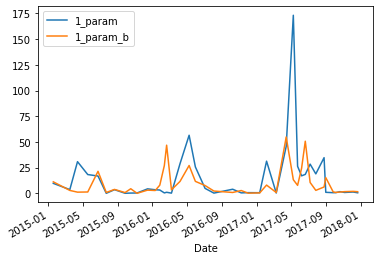

In [4]:
df.loc["2015":"2017"][["1_param","1_param_b"]].plot()

No ielasītās tabulas `df` izvēlēsimies periodu no 2015. līdz 2017. gadam izmantojot `.loc[]` un norādīsim kvadrātiekavās abus parametrus salīdzināšanai.
Vērts piefiksēt, ka perioda izvēlei tiek izmantots simbols `:`

Var redzēt, ka ir periodi, kad `1_param` ir lielāks par `1_param_b`, un otrādi.
Aplūkosim šo parametru atšķirības.

In [5]:
df["1_param_diff"]=df["1_param"]-df["1_param_b"]

Tabulā `df` tiek izveidota jauna kolonna `"1_param_diff"`, kas ir pirmā parametra starpība starp tā vērtību sākumā un beigās.
Uzzīmēsim šo starpību grafiski.

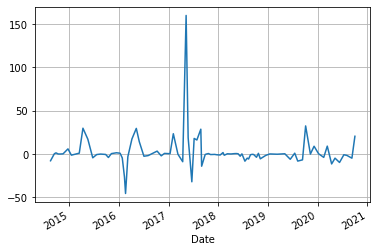

In [6]:
df["1_param_diff"].plot(grid=True)

In [40]:
numpy.seterr("warn")

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [41]:
s=df.apply(lambda row: 
           (row["1_param"]-row["1_param_b"])/row["1_param"]*100 
           if row["1_param"]>row["1_param_b"] 
           else 
           (row["1_param"]-row["1_param_b"])/row["1_param_b"]*100, 
           axis=1)

<ipython-input-41-37e585476eea>:5: RuntimeWarning: invalid value encountered in double_scalars
  (row["1_param"]-row["1_param_b"])/row["1_param_b"]*100,


In [46]:
df[["1_param","1_param_b"]].where(df["1_param"]==0).dropna()

,1_param,1_param_b
Date,,
2014-10-13,0.0,0.14
2015-07-23,0.0,0.80
2018-06-11,0.0,2.72
2018-06-24,0.0,0.00
2018-08-02,0.0,4.94
2018-08-12,0.0,5.95
2018-08-26,0.0,0.99
2018-09-08,0.0,0.56
2018-09-18,0.0,0.74


Timestamp('2016-01-04 00:00:00')

In [73]:
df_mod=df.drop(pd.to_datetime("2018-06-24"))

In [76]:
df_mod.loc["2018"]

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b,1_param_diff
Date,,,,,,,,,,,,,,,
2018-01-15,1.05,58.968,61.38,12.6654,9.5942,80.5620,28.041,2.40,1.808,12.16,0.0768,0.0858,57.3078,31.360,-1.35
2018-02-05,1.80,15.138,40.60,37.2011,64.9175,283.8728,21.142,0.30,8.712,6.24,0.2976,0.5796,19.7330,7.430,1.50
2018-02-14,0.36,38.150,54.78,121.1724,127.5902,953.3707,26.280,1.96,8.235,6.72,0.2328,0.4403,26.5309,18.696,-1.60
2018-03-09,0.68,0.740,115.85,22.4332,20.3810,346.9280,20.039,0.60,7.040,60.52,12.0475,18.9131,59.3408,15.026,0.08
2018-03-28,0.22,105.440,142.74,12.1173,22.2026,422.3586,25.194,0.31,24.825,27.06,6.1732,4.2072,52.3120,12.444,-0.09
2018-04-05,0.39,15.878,24.92,2.3750,2.6703,485.8080,32.112,0.52,20.856,21.87,5.0232,1.9490,70.8400,26.352,-0.13
2018-04-27,0.22,8.274,31.62,19.8858,17.0208,21.3984,20.851,0.00,18.720,9.46,6.9078,4.4880,56.9241,24.000,0.22
2018-05-13,0.35,12.360,35.56,17.5788,30.5460,178.1200,15.057,0.00,19.807,27.06,4.2724,5.1220,111.1406,20.440,0.35
2018-05-27,0.25,3.880,33.92,30.1945,30.7296,196.0179,20.300,0.13,19.932,14.70,9.8568,5.3238,115.9938,12.614,0.12


In [77]:
s=df_mod.apply(lambda row: 
           (row["1_param"]-row["1_param_b"])/row["1_param"]*100 
           if row["1_param"]>row["1_param_b"] 
           else 
           (row["1_param"]-row["1_param_b"])/row["1_param_b"]*100, 
           axis=1)

In [78]:
s

Date
2014-08-18    -94.007051
2014-09-15     48.148148
2014-09-27     74.025974
2014-10-13   -100.000000
2014-10-26    -61.764706
                 ...    
2020-06-10    -97.549020
2020-07-12    -60.714286
2020-08-03    -79.555556
2020-09-09    -97.843137
2020-10-01     61.234940
Length: 89, dtype: float64

In [79]:
df["1_param_effectivity"]=s

In [80]:
df.loc["2018"]

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b,1_param_diff,1_param_effectivity
Date,,,,,,,,,,,,,,,,
2018-01-15,1.05,58.968,61.38,12.6654,9.5942,80.5620,28.041,2.40,1.808,12.16,0.0768,0.0858,57.3078,31.360,-1.35,-56.250000
2018-02-05,1.80,15.138,40.60,37.2011,64.9175,283.8728,21.142,0.30,8.712,6.24,0.2976,0.5796,19.7330,7.430,1.50,83.333333
2018-02-14,0.36,38.150,54.78,121.1724,127.5902,953.3707,26.280,1.96,8.235,6.72,0.2328,0.4403,26.5309,18.696,-1.60,-81.632653
2018-03-09,0.68,0.740,115.85,22.4332,20.3810,346.9280,20.039,0.60,7.040,60.52,12.0475,18.9131,59.3408,15.026,0.08,11.764706
2018-03-28,0.22,105.440,142.74,12.1173,22.2026,422.3586,25.194,0.31,24.825,27.06,6.1732,4.2072,52.3120,12.444,-0.09,-29.032258
2018-04-05,0.39,15.878,24.92,2.3750,2.6703,485.8080,32.112,0.52,20.856,21.87,5.0232,1.9490,70.8400,26.352,-0.13,-25.000000
2018-04-27,0.22,8.274,31.62,19.8858,17.0208,21.3984,20.851,0.00,18.720,9.46,6.9078,4.4880,56.9241,24.000,0.22,100.000000
2018-05-13,0.35,12.360,35.56,17.5788,30.5460,178.1200,15.057,0.00,19.807,27.06,4.2724,5.1220,111.1406,20.440,0.35,100.000000
2018-05-27,0.25,3.880,33.92,30.1945,30.7296,196.0179,20.300,0.13,19.932,14.70,9.8568,5.3238,115.9938,12.614,0.12,48.000000


In [82]:
df.dropna()

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b,1_param_diff,1_param_effectivity
Date,,,,,,,,,,,,,,,,
2014-08-18,0.51,0.033,0.84,0.0000,0.0320,5.6000,27.948,8.51,4.257,12.87,1.5480,1.2420,59.1600,14.780,-8.00,-94.007051
2014-09-15,0.27,0.160,0.30,62.8940,52.5000,580.8000,21.014,0.14,0.170,10.64,2.2500,6.1600,111.9800,7.590,0.13,48.148148
2014-09-27,1.54,3.492,20.48,0.8820,0.8500,44.5400,10.444,0.40,0.580,24.49,0.2880,0.8820,91.9440,29.146,1.14,74.025974
2014-10-13,0.00,7.688,41.60,3.7800,2.9280,163.0080,27.846,0.14,4.251,25.74,1.0070,2.5200,161.8750,16.317,-0.14,-100.000000
2014-10-26,0.13,5.670,13.72,2.1700,2.7200,29.2060,24.585,0.34,4.375,27.06,0.3190,1.9000,334.8100,18.564,-0.21,-61.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-09,0.00,32.640,20.16,3.3402,8.5272,987.6050,17.850,0.26,21.793,32.76,30.5130,21.3696,45.3675,8.964,-0.26,-100.000000
2019-12-06,12.54,12.180,25.20,3.2760,3.4398,36.1905,20.844,3.72,11.952,26.97,17.9211,21.0636,95.7819,13.345,8.82,70.334928
2020-01-08,0.39,6.880,36.26,2.7336,3.3528,114.7608,20.190,0.24,9.504,15.20,4.1154,5.4900,84.7280,19.084,0.15,38.461538


In [84]:
df.asfreq(freq="1D")


,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b,1_param_diff,1_param_effectivity
Date,,,,,,,,,,,,,,,,
2014-08-18,0.51,0.033,0.84,0.000,0.032,5.6,27.948,8.51,4.257,12.87,1.5480,1.242,59.16,14.780,-8.00,-94.007051
2014-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.fillna(method="bfill", limit=4).tail(30)

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b,1_param_diff,1_param_effectivity
Date,,,,,,,,,,,,,,,,
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-05,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480,-4.99,-97.843137
2020-09-06,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480,-4.99,-97.843137
2020-09-07,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480,-4.99,-97.843137
2020-09-08,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480,-4.99,-97.843137
2020-09-09,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480,-4.99,-97.843137
2020-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
